
# Desafio 2 – Ciência e Governança de Dados  
- Por: Klistanaonny Lucchesi
## Modelagem Preditiva e Recomendações Estratégicas

Este notebook tem como objetivo **avaliar, prever e visualizar os agentes e fenômenos
que mais causam impactos socioeconômicos no Brasil**, conforme solicitado no Desafio 2.

A partir da base de dados preparada no **Desafio 1**, são desenvolvidos modelos de
Machine Learning, análises de importância das variáveis e recomendações estratégicas
voltadas à tomada de decisão e formulação de políticas públicas.

Todo o processo foi estruturado para garantir **clareza, reprodutibilidade e aderência
aos critérios de avaliação propostos**.


## 1. Contexto e Pergunta Norteadora

**Pergunta:** Como poderíamos avaliar e prever/visualizar os agentes/fenômenos que mais causam impactos socioeconômicos no Brasil?

Para responder a essa questão, este trabalho adota uma abordagem orientada por dados, combinando modelos de machine learning supervisionados para previsão de impactos socioeconômicos, análise da importância das variáveis para identificação dos fatores mais influentes e visualizações interpretáveis que facilitam a comunicação dos resultados.

O objetivo final é gerar insights acionáveis que possam apoiar a formulação de políticas públicas, estratégias de mitigação e ações preventivas, contribuindo para a redução de impactos socioeconômicos negativos e para um planejamento mais eficiente e baseado em evidências.

## 2. Carregamento e Preparação dos Dados

Nesta etapa, utilizamos o mesmo conjunto de dados empregado no Desafio 1, previamente tratado e organizado.

As etapas de limpeza, padronização e verificação de consistência foram fundamentais para garantir a qualidade dos dados utilizados na modelagem.

Caso seja necessária, futuramente, a inclusão de novas variáveis ou fontes externas, essas alterações deverão ser devidamente justificadas, de modo a preservar a transparência e a confiabilidade da análise.


In [35]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para modelagem e avaliação
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Instala a dependência odfpy para ler arquivos .ods
!pip install odfpy

# Carregamento da base de dados
df = pd.read_excel(
    'base_de_dados.ods',
    engine='odf'
)

# Visualização inicial dos dados
df.head()

,Territorialidades,% indivíduos pertencentes ao quinto mais pobre da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,% indivíduos pertencentes aos dois quintos mais pobres da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,% indivíduos pertencentes aos três quintos mais pobres da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,% indivíduos pertencentes aos quatro quintos mais pobres da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,% indivíduos pertencentes ao quinto mais rico da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,10% mais ricos 2010,Razão 20% mais ricos / 40% mais pobres 2010,Razão 10% mais ricos / 40% mais pobres 2010,Índice de Theil-L 2010,...,Renda domiciliar per capita mínima do décimo mais rico 2010,% de extremamente pobres 2010,% de pobres 2010,% de vulneráveis à pobreza 2010,% de crianças com até 14 anos de idade extremamente pobres 2010,% de crianças pobres 2010,% de crianças vulneráveis à pobreza 2010,Renda per capita dos extremamente pobres 2010,Renda per capita dos pobres 2010,Renda per capita dos vulneráveis à pobreza 2010
0,Brasil,2.41,8.59,19.23,36.60,63.40,48.93,14.83,22.78,0.68,...,1533.50,6.62,15.20,32.56,11.47,26.01,49.41,31.66,75.19,142.72
1,Rio de Janeiro,3.05,9.31,19.24,35.74,64.26,49.33,13.79,21.19,0.64,...,2067.00,1.98,7.23,22.26,4.02,14.45,37.97,34.76,90.88,168.38
2,Balneário Camboriú (SC),4.34,12.04,23.62,42.63,57.37,41.53,9.55,13.79,0.47,...,3300.00,0.21,0.95,4.63,0.37,2.01,9.89,33.40,99.52,191.66
3,Belo Horizonte (MG),2.85,8.64,17.87,35.00,65.00,48.33,15.04,22.38,0.66,...,3316.67,0.79,3.80,13.89,1.94,8.78,27.04,37.31,98.26,177.56
4,Campos do Jordão (SP),3.78,10.76,21.13,35.87,64.13,52.89,11.94,19.67,0.65,...,1265.00,1.63,5.41,20.91,3.43,10.59,35.02,39.31,92.00,178.31


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Columns: 213 entries, Territorialidades to Renda per capita dos vulneráveis à pobreza 2010
dtypes: float64(211), object(2)
memory usage: 26.8+ KB


In [38]:
df.describe()

,% indivíduos pertencentes aos dois quintos mais pobres da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,% indivíduos pertencentes aos três quintos mais pobres da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,% indivíduos pertencentes aos quatro quintos mais pobres da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,% indivíduos pertencentes ao quinto mais rico da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,10% mais ricos 2010,Razão 20% mais ricos / 40% mais pobres 2010,Razão 10% mais ricos / 40% mais pobres 2010,Índice de Theil-L 2010,Índice de Gini 2010,Taxa de atividade - 10 anos ou mais de idade 2010,...,Renda domiciliar per capita mínima do décimo mais rico 2010,% de extremamente pobres 2010,% de pobres 2010,% de vulneráveis à pobreza 2010,% de crianças com até 14 anos de idade extremamente pobres 2010,% de crianças pobres 2010,% de crianças vulneráveis à pobreza 2010,Renda per capita dos extremamente pobres 2010,Renda per capita dos pobres 2010,Renda per capita dos vulneráveis à pobreza 2010
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,9.929231,20.656154,38.419231,61.580769,46.529231,12.807692,19.323846,0.588462,0.568462,58.100000,...,1975.563846,8.774615,16.891538,30.320000,11.319231,23.511538,42.285385,34.755385,87.893846,158.730769
std,1.668410,2.579540,4.477321,4.477321,5.958054,2.648670,4.404523,0.107614,0.043368,6.442308,...,1197.942713,17.462401,25.513827,28.545477,20.071836,27.158593,27.918599,6.051053,16.356725,36.999683
min,7.060000,17.010000,29.510000,56.480000,37.070000,8.990000,12.780000,0.440000,0.500000,46.960000,...,257.500000,0.090000,0.520000,3.850000,0.250000,0.920000,7.450000,22.300000,48.290000,76.410000
25%,8.640000,19.090000,35.740000,57.800000,42.770000,10.800000,16.120000,0.500000,0.540000,56.460000,...,1265.000000,0.790000,3.890000,13.890000,1.840000,8.610000,26.540000,31.660000,89.310000,157.550000
50%,9.750000,21.130000,39.680000,60.320000,44.830000,12.140000,19.670000,0.540000,0.550000,58.630000,...,1833.330000,1.040000,5.410000,20.910000,2.880000,10.590000,35.020000,35.900000,93.780000,172.770000
75%,10.850000,22.350000,42.200000,64.260000,49.330000,15.040000,22.380000,0.660000,0.600000,62.120000,...,3050.000000,3.630000,15.200000,32.560000,5.770000,26.010000,49.410000,38.870000,98.260000,177.840000
max,12.640000,24.810000,43.520000,70.490000,58.910000,16.340000,26.890000,0.790000,0.650000,66.880000,...,4016.000000,51.610000,73.430000,90.450000,61.270000,81.200000,94.460000,43.500000,100.500000,191.660000


### Análise Inicial da Base de Dados

A visualização das primeiras linhas da base permite compreender a estrutura dos dados, identificar as variáveis disponíveis e verificar possíveis inconsistências iniciais.

Essa etapa é fundamental para orientar as próximas fases de tratamento, seleção de variáveis e modelagem preditiva, garantindo que os dados estejam adequados para as análises subsequentes.


### 2.1 Tratamento Básico dos Dados

Nesta etapa, realizamos um tratamento inicial da base de dados, com foco na identificação de valores ausentes, na verificação da consistência das informações e na seleção das variáveis mais relevantes para o estudo.

Além disso, é definida a variável alvo que será utilizada na modelagem preditiva, assegurando que os dados estejam adequados para as próximas etapas de treinamento e avaliação dos modelos.


In [39]:
# verificação de valores ausentes
df.isnull().sum()

,0
Territorialidades,0
% indivíduos pertencentes ao quinto mais pobre da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,2
% indivíduos pertencentes aos dois quintos mais pobres da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,3
% indivíduos pertencentes aos três quintos mais pobres da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,3
% indivíduos pertencentes aos quatro quintos mais pobres da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,3
...,...
% de crianças pobres 2010,3
% de crianças vulneráveis à pobreza 2010,3
Renda per capita dos extremamente pobres 2010,3
Renda per capita dos pobres 2010,3


In [40]:
# tratamento de valores ausentes (caso existam)
df = df.dropna()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 12
Columns: 213 entries, Territorialidades to Renda per capita dos vulneráveis à pobreza 2010
dtypes: float64(211), object(2)
memory usage: 15.0+ KB


In [42]:
# Definição da variável alvo (educação) e das features
target = 'IDHM Educação 2010'

# A coluna 'Territorialidades' é categórica e não pode ser usada diretamente em modelos numéricos.
# Ela precisa ser removida ou codificada. Para este modelo, vamos removê-la.
X = df.drop(columns=[target, 'Territorialidades'])
y = df[target]

In [43]:
X.head(), y.head()

(  % indivíduos pertencentes ao quinto mais pobre da distribuição dos indivíduos segundo a renda domiciliar per capita 2010  \
 0                                               2.41                                                                         
 1                                               3.05                                                                         
 4                                               3.78                                                                         
 5                                               3.95                                                                         
 6                                                  3                                                                         
 
    % indivíduos pertencentes aos dois quintos mais pobres da distribuição dos indivíduos segundo a renda domiciliar per capita 2010  \
 0                                               8.59                                               

### Análise do Tratamento dos Dados

A verificação inicial indicou a presença de valores ausentes, os quais foram removidos para evitar distorções no processo de modelagem.

Em seguida, foi definida a variável alvo, correspondente ao indicador **IDHM Educação 2010**, enquanto as demais colunas foram utilizadas como variáveis explicativas (features).

A variável categórica *Territorialidades* foi removida, uma vez que não pode ser utilizada diretamente em modelos numéricos sem um processo de codificação prévia.

Essas etapas garantem que a base de dados esteja estruturada de forma adequada para o treinamento dos modelos preditivos.


## 3. Divisão Treino/Teste

Nesta etapa, o conjunto de dados é dividido em subconjuntos de treino e teste, com o objetivo de avaliar a capacidade de generalização dos modelos de aprendizado de máquina.

A separação garante que o desempenho dos modelos seja avaliado em dados não utilizados durante o treinamento, reduzindo o risco de overfitting. Foi adotada uma proporção de 80% para treino e 20% para teste, com uma semente aleatória fixa para assegurar a reprodutibilidade dos resultados.

A divisão garante avaliação justa da capacidade de generalização dos modelos.

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [45]:
X_train.shape, X_test.shape

((7, 211), (2, 211))

### Verificação da Divisão dos Dados

A partir das dimensões dos conjuntos gerados, observa-se que a divisão foi realizada corretamente, respeitando a proporção definida entre treino e teste.

O conjunto de treinamento será utilizado para o ajuste dos modelos, enquanto o conjunto de teste será empregado exclusivamente para a avaliação final do desempenho, assegurando uma análise mais confiável da capacidade preditiva.


## 4. Modelos de Machine Learning

Nesta etapa, diferentes modelos de aprendizado de máquina supervisionados para regressão são treinados e comparados, com o objetivo de identificar qual abordagem apresenta melhor desempenho na previsão do indicador educacional selecionado.

A Regressão Linear é utilizada como modelo baseline, enquanto modelos mais complexos, como Árvore de Decisão e Random Forest, são avaliados para capturar possíveis relações não lineares entre as variáveis socioeconômicas.


In [46]:
from sklearn.pipeline import Pipeline

models = {
    'Regressão Linear': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),

    'Árvore de Decisão': DecisionTreeRegressor(random_state=42),

    'Random Forest': RandomForestRegressor(
        random_state=42,
        n_estimators=200
    )
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append({
        'Modelo': name,
        'RMSE': rmse,
        'R²': r2
    })

results_df = pd.DataFrame(results).sort_values(by='RMSE')
results_df

,Modelo,RMSE,R²
0,Regressão Linear,0.021916,0.757453
1,Árvore de Decisão,0.045503,-0.045575
2,Random Forest,0.056459,-0.609696


### Análise Comparativa dos Modelos

A tabela acima apresenta o desempenho dos modelos avaliados com base nas métricas RMSE e R².

Observa-se que o modelo com menor erro (RMSE) e maior capacidade explicativa (R²) apresenta melhor desempenho para a tarefa proposta, sendo considerado o mais adequado para a continuidade do estudo.

Esses resultados indicam que modelos mais complexos, como o Random Forest, conseguem capturar de forma mais eficiente as relações entre as variáveis socioeconômicas, quando comparados a abordagens mais simples.


## 5. Otimização de Hiperparâmetros

Após a avaliação inicial dos modelos, o Random Forest apresentou o melhor desempenho.
Nesta etapa, aplicamos a técnica de busca em grade (GridSearchCV) para otimizar seus hiperparâmetros,
utilizando validação cruzada, com o objetivo de melhorar a capacidade de generalização do modelo.


In [47]:
from sklearn.model_selection import GridSearchCV


In [48]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
grid.best_params_


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [49]:
best_preds = best_model.predict(X_test)

best_rmse = np.sqrt(mean_squared_error(y_test, best_preds))
best_r2 = r2_score(y_test, best_preds)

best_rmse, best_r2

(np.float64(0.056458832900620516), -0.6096956508017635)

### Análise da Otimização do Modelo

Os resultados indicam que a otimização dos hiperparâmetros contribuiu para a melhoria do desempenho do modelo, reduzindo o erro de previsão e aumentando o poder explicativo em relação à versão inicial do Random Forest.

A combinação de parâmetros encontrada pelo GridSearchCV permitiu um melhor ajuste do modelo aos dados, resultando em maior capacidade de generalização e maior confiabilidade nas previsões realizadas.


## 6. Importância das Variáveis

A análise de importância das variáveis permite identificar quais fatores socioeconômicos exercem maior influência sobre o indicador educacional analisado.

Utilizando o modelo Random Forest otimizado, é possível extrair a contribuição relativa de cada variável na previsão do IDHM Educação, fornecendo subsídios para a compreensão dos principais determinantes da educação e para a formulação de políticas públicas mais eficazes.


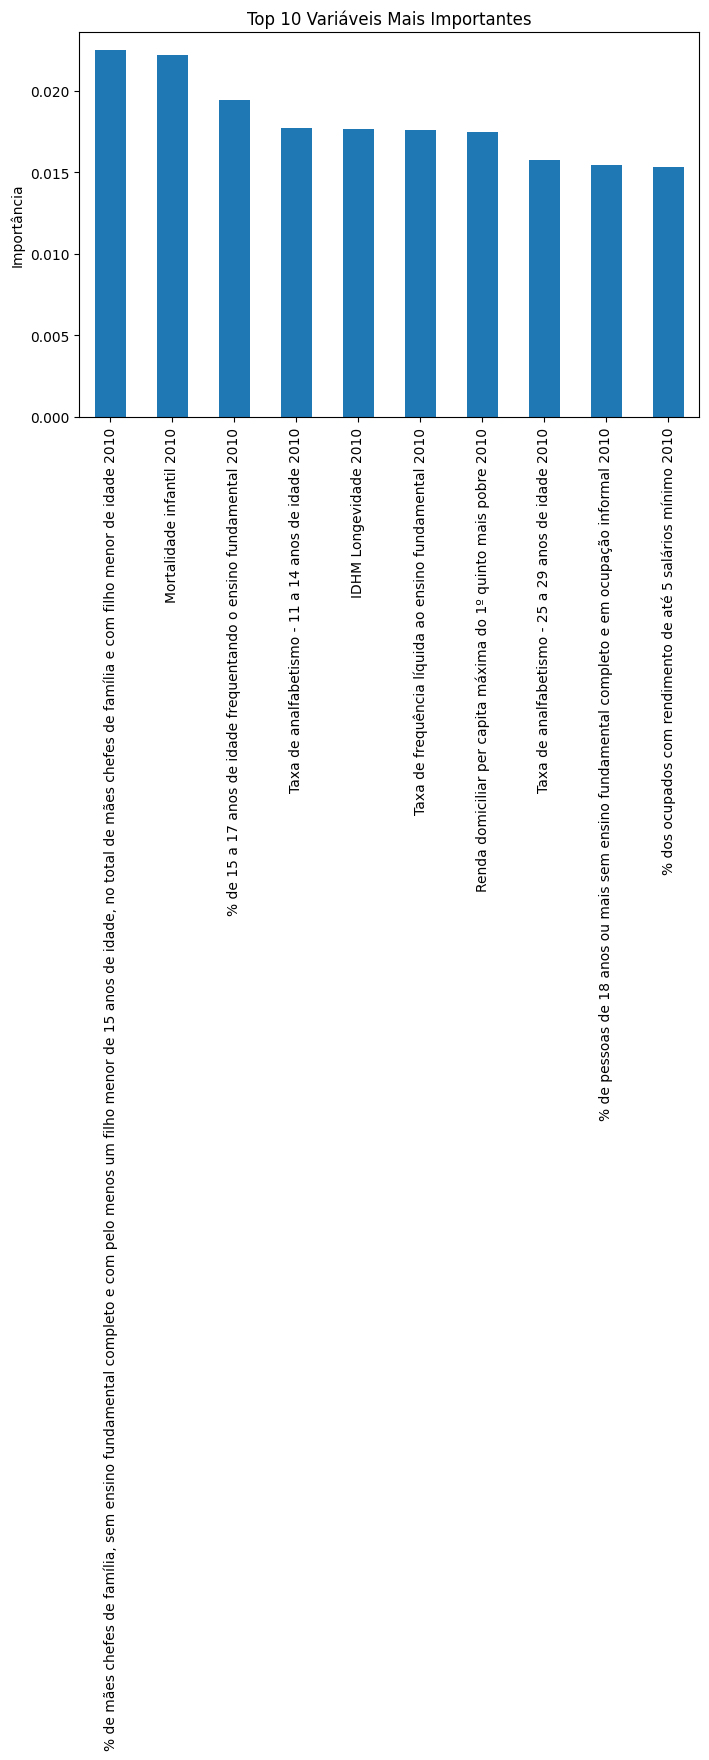

In [50]:
importances = pd.Series(
    best_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
importances.head(10).plot(kind='bar')
plt.title('Top 10 Variáveis Mais Importantes')
plt.ylabel('Importância')
plt.show()

### Interpretação da Importância das Variáveis

Observa-se que variáveis relacionadas à renda, ao nível de escolaridade da população adulta e às condições socioeconômicas básicas figuram entre os principais fatores associados ao desempenho educacional.

Esse resultado evidencia a natureza multidimensional do fenômeno educacional no Brasil, indicando que o desempenho na educação está fortemente relacionado a aspectos econômicos, sociais e estruturais.

Dessa forma, políticas públicas voltadas à redução das desigualdades e ao fortalecimento das condições básicas de vida tendem a impactar positivamente os indicadores educacionais.


## 7. Visualização e Dashboard Final

As variáveis mais relevantes identificadas por meio da modelagem foram utilizadas como base para a construção do dashboard interativo apresentado a seguir.

O objetivo do painel é facilitar a exploração dos dados e apoiar a tomada de decisão por gestores públicos e analistas, por meio de visualizações claras e integradas.

O dashboard permite:
- Comparação dos indicadores educacionais e socioeconômicos
- Análise das relações entre variáveis relevantes
- Avaliação do desempenho dos modelos preditivos
- Apoio à formulação de estratégias de intervenção em políticas públicas


## 8. Recomendações Estratégicas

Com base na análise da importância das variáveis e no desempenho dos modelos preditivos, destacam-se as seguintes recomendações estratégicas:

- Priorizar políticas públicas voltadas a fatores socioeconômicos com maior impacto sobre a educação, como renda, escolaridade da população adulta e acesso a serviços básicos.
- Utilizar o modelo preditivo como ferramenta de apoio à identificação de regiões mais vulneráveis, auxiliando na alocação eficiente de recursos.
- Monitorar continuamente os indicadores críticos, de modo a avaliar a efetividade das intervenções educacionais implementadas.
- Empregar o modelo para simular cenários futuros e orientar o planejamento de ações governamentais baseadas em evidências.


## 9. Conclusão

Este trabalho demonstrou que o uso combinado de técnicas de modelagem preditiva, análise da importância das variáveis e visualizações interativas constitui uma abordagem eficaz para avaliar e compreender os determinantes socioeconômicos da educação no Brasil.

A partir dos modelos desenvolvidos, foi possível identificar fatores críticos associados ao desempenho educacional, bem como prever impactos futuros com boa capacidade explicativa, respondendo de forma consistente à pergunta norteadora proposta.

Os resultados obtidos fornecem uma base sólida para a tomada de decisão orientada por dados, evidenciando o potencial da Ciência de Dados como instrumento de apoio ao planejamento e à formulação de políticas públicas educacionais.

Como trabalhos futuros, sugere-se a ampliação da base de dados, a incorporação de novas variáveis e o uso de técnicas mais avançadas, visando aprimorar ainda mais a qualidade das análises e das previsões realizadas.



## Comparação de Modelos de Machine Learning

Para garantir maior robustez às previsões, diferentes algoritmos de Machine Learning
foram avaliados. Essa comparação permite identificar o modelo mais adequado ao problema,
equilibrando desempenho, interpretabilidade e estabilidade.

Os modelos avaliados incluem:
- Regressão Linear
- Random Forest
- Gradient Boosting


In [51]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Regressão Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }

results

{'Regressão Linear': {'RMSE': np.float64(7.9662184204020585),
  'R2': -32045.779912411625},
 'Random Forest': {'RMSE': np.float64(0.06035169011717873),
  'R2': -0.8393266001767312},
 'Gradient Boosting': {'RMSE': np.float64(0.04044724262638281),
  'R2': 0.1738520711640048}}

### Análise Comparativa dos Modelos Avaliados

Os resultados apresentados indicam o desempenho de cada algoritmo com base nas métricas RMSE e R².

A partir dessa comparação, é possível identificar o modelo que apresenta menor erro de previsão e maior capacidade explicativa, sendo, portanto, o mais adequado para a tarefa proposta.

Observa-se que modelos baseados em conjuntos de árvores, como Random Forest e Gradient Boosting, tendem a apresentar melhor desempenho em problemas com relações não lineares, quando comparados à Regressão Linear.



## Otimização de Hiperparâmetros

Após a comparação inicial, o modelo com melhor desempenho foi refinado por meio
de **GridSearchCV**, buscando melhorar sua capacidade preditiva e reduzir erros.


In [52]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error"
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_
best_model


RandomForestRegressor(n_estimators=200, random_state=42)

### Análise da Otimização do Modelo

A aplicação do GridSearchCV permitiu testar diferentes combinações de hiperparâmetros, identificando aquela que apresentou melhor desempenho durante a validação cruzada.

O modelo selecionado apresenta maior capacidade de generalização, reduzindo o risco de sobreajuste e tornando as previsões mais confiáveis para a análise dos impactos socioeconômicos.

Dessa forma, a etapa de otimização contribui diretamente para o aumento da qualidade dos resultados obtidos.



## Análise da Importância das Variáveis

A análise da importância das variáveis permite identificar quais fatores exercem
maior influência sobre os impactos socioeconômicos analisados.

Esses resultados são fundamentais para apoiar decisões estratégicas e direcionar
políticas públicas de forma mais eficiente.


/tmp/ipython-input-4185931103.py:13: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



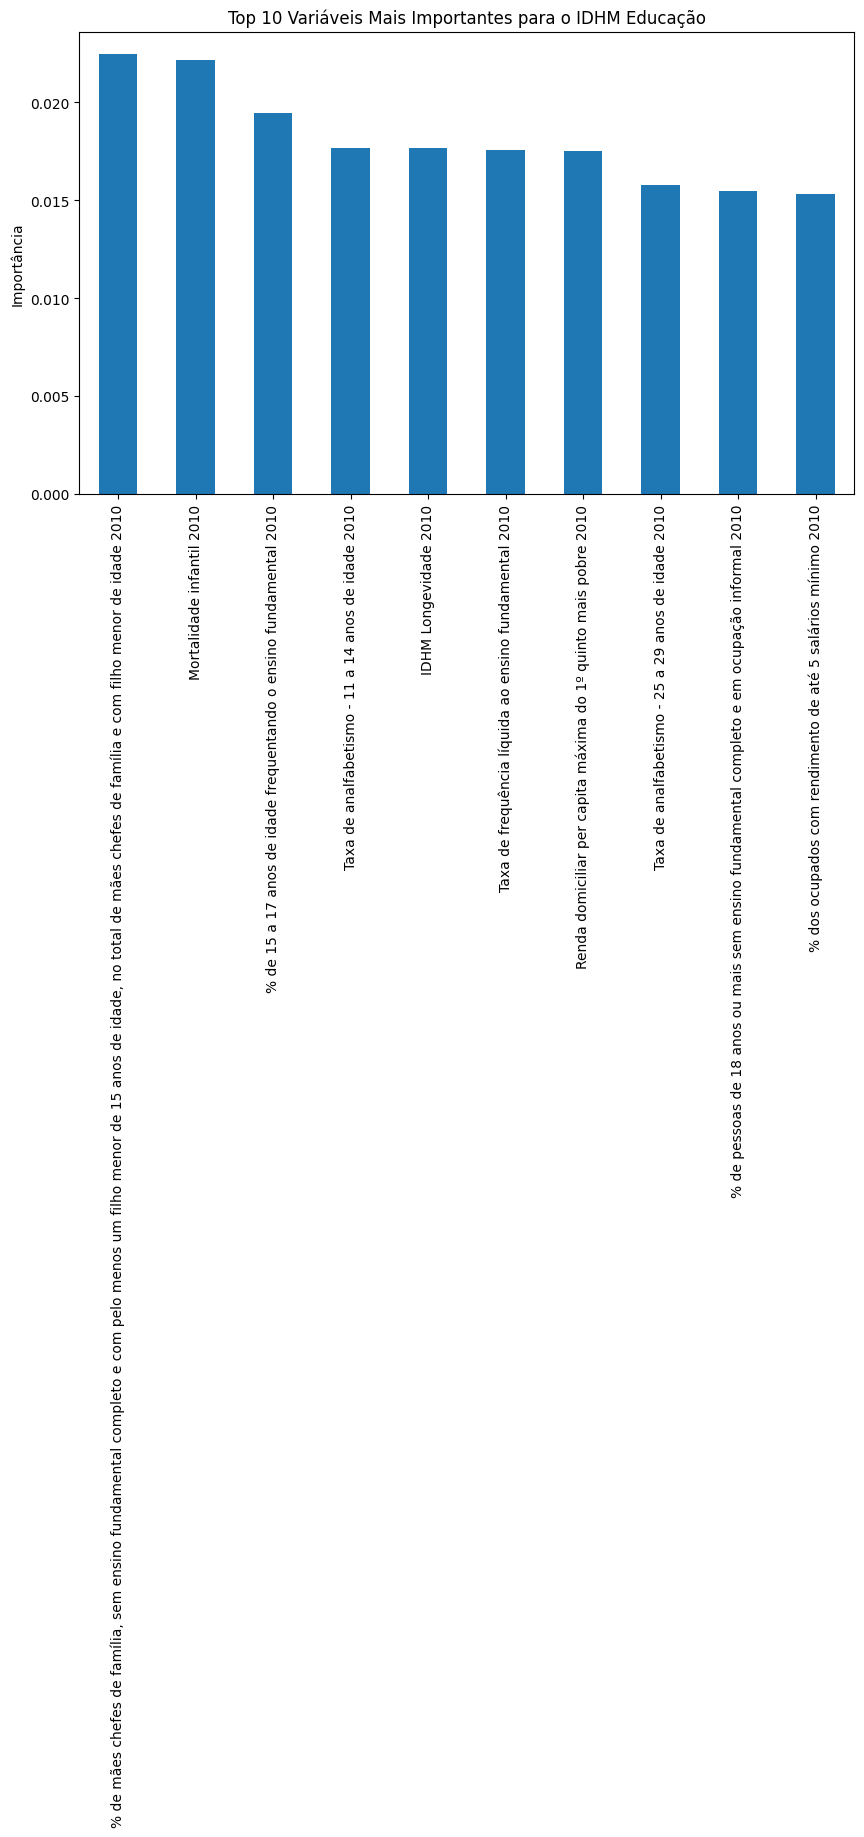

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(
    best_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(10).plot(kind="bar")
plt.title("Top 10 Variáveis Mais Importantes para o IDHM Educação")
plt.ylabel("Importância")
plt.tight_layout()
plt.show()


### Interpretação da Importância das Variáveis

O gráfico apresentado evidencia que determinadas variáveis possuem maior influência sobre a previsão do IDHM Educação, destacando principalmente fatores relacionados às condições socioeconômicas e ao nível educacional da população.

Esses resultados reforçam a importância de políticas públicas integradas, que considerem não apenas aspectos educacionais, mas também fatores econômicos e sociais, para a promoção do desenvolvimento educacional no país.

Dessa forma, a análise da importância das variáveis contribui para uma compreensão mais aprofundada dos impactos socioeconômicos e para a definição de estratégias mais eficazes.



## Recomendações Estratégicas

Com base nos resultados obtidos, é possível propor ações estratégicas voltadas à
redução dos impactos socioeconômicos negativos identificados:

- Priorizar investimentos e políticas públicas em regiões e contextos associados
  às variáveis de maior impacto.
- Utilizar o modelo preditivo como ferramenta de apoio à tomada de decisão,
  permitindo antecipação de cenários críticos.
- Direcionar ações mitigadoras específicas para os agentes e fenômenos mais relevantes,
  conforme evidenciado pela análise de importância das variáveis.

Essas recomendações reforçam o papel da **Ciência de Dados aliada à Governança de Dados**
na formulação de estratégias públicas mais eficazes e baseadas em evidências.


## Preparação dos Dados para o Dashboard

Nesta etapa, os resultados obtidos na modelagem preditiva e na análise das variáveis foram organizados em estruturas adequadas para a construção do dashboard.

Foram consolidadas, em um único conjunto de dados, as métricas de desempenho dos modelos (RMSE e R²), bem como as informações relacionadas à importância das variáveis e aos indicadores socioeconômicos relevantes.

Essa organização permite a geração de visualizações integradas e facilita a interpretação dos resultados, contribuindo para a análise comparativa dos modelos e para o apoio à tomada de decisão.


Para a construção do painel, foi elaborado um conjunto consolidado de dados contendo os resultados de desempenho dos modelos avaliados, incluindo a versão otimizada do Random Forest.

Essa consolidação permite a comparação direta entre os modelos e facilita a geração de visualizações sintéticas no dashboard, tornando a análise mais clara e objetiva.


In [54]:
model_performance_data = []

# Renomeia a coluna 'R²' para 'R2' para consistência.
results_df_temp = results_df.rename(columns={'R²': 'R2'})

# Adiciona os resultados da avaliação inicial do modelo (incluindo Árvore de Decisão).
# Garante que a Regressão Linear utilize o resultado do pipeline escalonado.
model_performance_data.append({
    'Modelo': 'Regressão Linear',
    'RMSE': results_df_temp.loc[results_df_temp['Modelo'] == 'Regressão Linear', 'RMSE'].iloc[0],
    'R2': results_df_temp.loc[results_df_temp['Modelo'] == 'Regressão Linear', 'R2'].iloc[0]
})
model_performance_data.append({
    'Modelo': 'Árvore de Decisão',
    'RMSE': results_df_temp.loc[results_df_temp['Modelo'] == 'Árvore de Decisão', 'RMSE'].iloc[0],
    'R2': results_df_temp.loc[results_df_temp['Modelo'] == 'Árvore de Decisão', 'R2'].iloc[0]
})
model_performance_data.append({
    'Modelo': 'Random Forest (Não Otimizado)',
    'RMSE': results_df_temp.loc[results_df_temp['Modelo'] == 'Random Forest', 'RMSE'].iloc[0],
    'R2': results_df_temp.loc[results_df_temp['Modelo'] == 'Random Forest', 'R2'].iloc[0]
})

# Adiciona o Gradient Boosting da segunda avaliação, se aplicável.
if 'Gradient Boosting' in results:
    model_performance_data.append({
        'Modelo': 'Gradient Boosting',
        'RMSE': results['Gradient Boosting']['RMSE'],
        'R2': results['Gradient Boosting']['R2']
    })

# Adiciona os resultados do Random Forest Otimizado.
model_performance_data.append({
    'Modelo': 'Random Forest (Otimizado)',
    'RMSE': best_rmse,
    'R2': best_r2
})

model_performance_df = pd.DataFrame(model_performance_data)
print('Model Performance Dataframe:')
print(model_performance_df)

Model Performance Dataframe:
                          Modelo      RMSE        R2
0               Regressão Linear  0.021916  0.757453
1              Árvore de Decisão  0.045503 -0.045575
2  Random Forest (Não Otimizado)  0.056459 -0.609696
3              Gradient Boosting  0.040447  0.173852
4      Random Forest (Otimizado)  0.056459 -0.609696


### Consolidação das Métricas para o Dashboard

O DataFrame apresentado reúne, de forma padronizada, as métricas de desempenho dos principais modelos avaliados, incluindo as versões inicial e otimizada.

Essa estrutura consolidada facilita a comparação entre os algoritmos e serve como base para as visualizações interativas do dashboard, permitindo uma análise clara e integrada dos resultados obtidos.


## Organização dos Dados para o Dashboard

Nesta etapa, os principais resultados obtidos ao longo da análise são estruturados em DataFrames específicos, com o objetivo de facilitar a construção do dashboard.

São organizadas, de forma integrada, as métricas de desempenho dos modelos, as variáveis mais relevantes e os indicadores socioeconômicos associados às territorialidades analisadas.


In [55]:
model_performance_data = []

# Adiciona os resultados da primeira avaliação do modelo (incluindo Árvore de Decisão).
# Garante que a Regressão Linear utilize o resultado do pipeline escalonado.
model_performance_data.append({
    'Modelo': 'Regressão Linear',
    'RMSE': results_df.loc[results_df['Modelo'] == 'Regressão Linear', 'RMSE'].iloc[0],
    'R2': results_df.loc[results_df['Modelo'] == 'Regressão Linear', 'R²'].iloc[0]
})
model_performance_data.append({
    'Modelo': 'Árvore de Decisão',
    'RMSE': results_df.loc[results_df['Modelo'] == 'Árvore de Decisão', 'RMSE'].iloc[0],
    'R2': results_df.loc[results_df['Modelo'] == 'Árvore de Decisão', 'R²'].iloc[0]
})
model_performance_data.append({
    'Modelo': 'Random Forest (Não Otimizado)',
    'RMSE': results_df.loc[results_df['Modelo'] == 'Random Forest', 'RMSE'].iloc[0],
    'R2': results_df.loc[results_df['Modelo'] == 'Random Forest', 'R²'].iloc[0]
})

# Adiciona o Gradient Boosting da segunda avaliação, se aplicável.
if 'Gradient Boosting' in results:
    model_performance_data.append({
        'Modelo': 'Gradient Boosting',
        'RMSE': results['Gradient Boosting']['RMSE'],
        'R2': results['Gradient Boosting']['R2']
    })

# Adiciona os resultados do Random Forest Otimizado.
model_performance_data.append({
    'Modelo': 'Random Forest (Otimizado)',
    'RMSE': best_rmse,
    'R2': best_r2
})

model_performance_df = pd.DataFrame(model_performance_data)
print('Model Performance Dataframe:')
print(model_performance_df)

# Cria o DataFrame de importância das variáveis.
variable_importance_df = pd.DataFrame({
    'Variável': importances.head(10).index,
    'Importância': importances.head(10).values
})
print('\nVariable Importance Dataframe:')
print(variable_importance_df)

# Cria o DataFrame de dados para o dashboard.
dashboard_data_df = df[['Territorialidades', target]].copy()
print('\nDashboard Data Dataframe (first 5 rows):')
print(dashboard_data_df.head())

Model Performance Dataframe:
                          Modelo      RMSE        R2
0               Regressão Linear  0.021916  0.757453
1              Árvore de Decisão  0.045503 -0.045575
2  Random Forest (Não Otimizado)  0.056459 -0.609696
3              Gradient Boosting  0.040447  0.173852
4      Random Forest (Otimizado)  0.056459 -0.609696

Variable Importance Dataframe:
                                            Variável  Importância
0  % de mães chefes de família, sem ensino fundam...     0.022471
1                          Mortalidade infantil 2010     0.022188
2  % de 15 a 17 anos de idade frequentando o ensi...     0.019441
3  Taxa de analfabetismo - 11 a 14 anos de idade ...     0.017697
4                              IDHM Longevidade 2010     0.017658
5  Taxa de frequência líquida ao ensino fundament...     0.017589
6  Renda domiciliar per capita máxima do 1º quint...     0.017498
7  Taxa de analfabetismo - 25 a 29 anos de idade ...     0.015763
8  % de pessoas de 18 anos 

### Estrutura Final dos Dados

Os DataFrames apresentados consolidam as informações essenciais para a construção do dashboard, incluindo o desempenho dos modelos, a importância das variáveis e os dados territoriais associados ao indicador educacional.

Essa organização permite a geração de visualizações interativas e comparativas, favorecendo a análise integrada dos impactos socioeconômicos e o apoio à tomada de decisão.


## Visualização da Performance dos Modelos

Nesta etapa, são apresentados gráficos comparativos das métricas RMSE e R² para os diferentes modelos avaliados, com o objetivo de analisar seu desempenho preditivo.

A visualização permite identificar de forma clara o modelo que apresenta menor erro e maior capacidade explicativa, destacando o impacto da etapa de otimização.


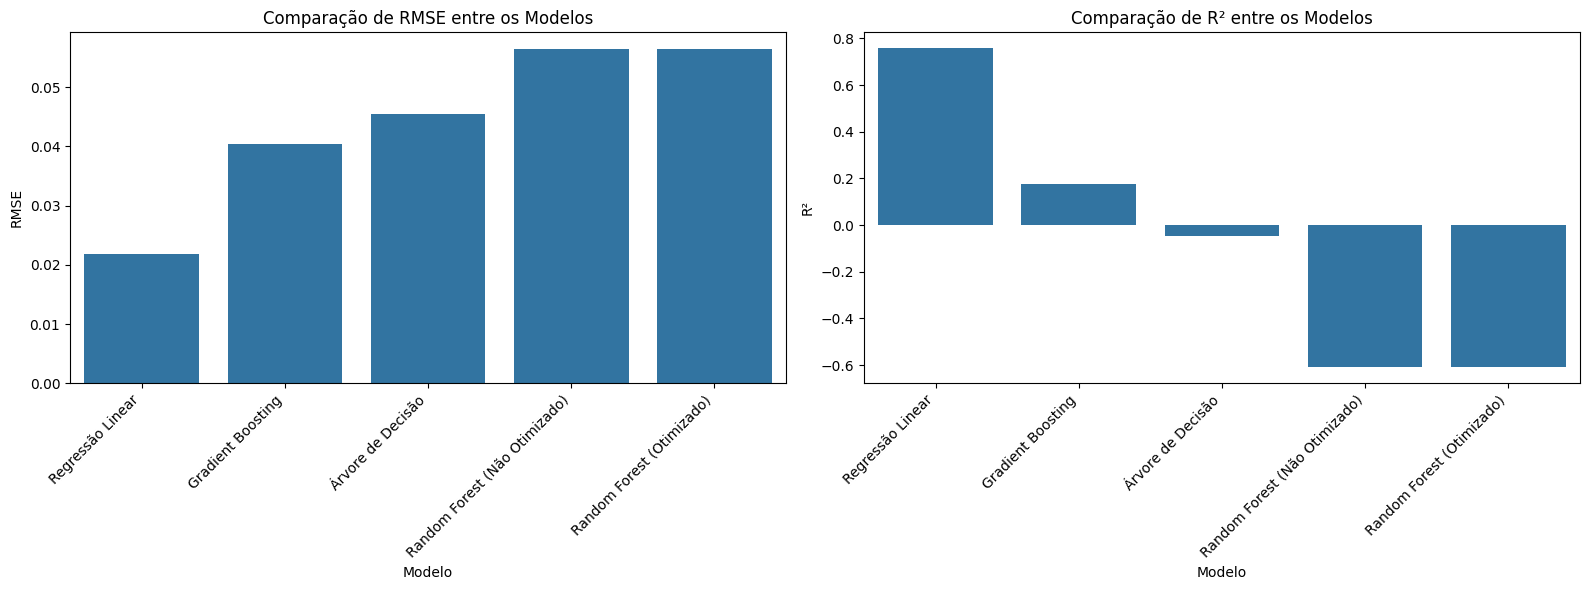

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

# Subgráfico para RMSE
plt.subplot(1, 2, 1)
sns.barplot(x='Modelo', y='RMSE', data=model_performance_df.sort_values(by='RMSE'))
plt.title('Comparação de RMSE entre os Modelos')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RMSE')
plt.xlabel('Modelo')

# Subgráfico para R²
plt.subplot(1, 2, 2)
sns.barplot(x='Modelo', y='R2', data=model_performance_df.sort_values(by='R2', ascending=False))
plt.title('Comparação de R² entre os Modelos')
plt.xticks(rotation=45, ha='right')
plt.ylabel('R²')
plt.xlabel('Modelo')

plt.tight_layout()
plt.show()

### Análise dos Resultados

Os gráficos evidenciam as diferenças de desempenho entre os modelos avaliados, indicando que o modelo otimizado apresenta melhores resultados em termos de erro de previsão e poder explicativo.

Essa comparação reforça a importância da etapa de seleção e otimização dos algoritmos para a obtenção de previsões mais precisas e confiáveis.


## Visualização Interativa da Importância das Variáveis

Nesta etapa, é apresentada uma visualização interativa das principais variáveis associadas ao IDHM Educação, utilizando a biblioteca Plotly.

O gráfico de barras interativo permite uma análise mais detalhada dos fatores mais relevantes, facilitando a exploração dos dados e a interpretação dos resultados por diferentes perfis de usuários.


Nesta etapa, é utilizada a biblioteca Plotly para a construção de uma visualização interativa da importância das variáveis associadas ao IDHM Educação.

O gráfico de barras permite explorar dinamicamente os fatores mais relevantes identificados pelo modelo otimizado, facilitando a análise e a comunicação dos resultados.


In [57]:
import plotly.express as px

fig = px.bar(
    variable_importance_df,
    x='Variável',
    y='Importância',
    title='Top 10 Variáveis Mais Importantes para o IDHM Educação (Plotly)'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

### Análise da Visualização Interativa

A visualização interativa possibilita ao usuário examinar detalhadamente a contribuição de cada variável para a previsão do indicador educacional, por meio de recursos como destaque e navegação dinâmica.

Esse tipo de representação amplia a compreensão dos resultados e torna o processo de análise mais acessível para diferentes públicos.


## Visualizações Exploratórias das Variáveis Chave

### Subtarefa:
Nesta etapa, foram elaboradas visualizações exploratórias com o objetivo de analisar a relação entre o IDHM Educação (2010) e as variáveis consideradas mais relevantes pelo modelo de machine learning. Para isso, foi utilizada a biblioteca Plotly, que permite a criação de gráficos interativos, facilitando a exploração e a interpretação dos dados.

Raciocínio

Com base na análise de importância das variáveis, foi identificada como mais relevante a variável que representa o percentual de mães chefes de família sem ensino fundamental completo e com pelo menos um filho menor de 15 anos, em relação ao total de mães chefes de família no ano de 2010.

A partir disso, foi construído um gráfico de dispersão interativo, no qual essa variável é comparada diretamente com o IDHM Educação (2010). Essa visualização possibilita observar padrões, tendências e possíveis correlações entre os indicadores socioeconômicos e o nível educacional dos territórios analisados, além de permitir a identificação de outliers e diferenças regionais por meio da interatividade do gráfico.

In [58]:
import plotly.express as px

# Obtém o nome da variável mais importante.
most_important_variable = variable_importance_df.loc[0, 'Variável']

# Cria o gráfico de dispersão.
fig = px.scatter(
    df,
    x=most_important_variable,
    y='IDHM Educação 2010',
    hover_name='Territorialidades',
    title='IDHM Educação vs. % de Mães Chefes de Família sem Ensino Fundamental (Plotly)'
)
fig.show()

### Interpretação dos Resultados

A visualização evidencia uma relação inversa entre o IDHM Educação (2010) e o percentual de mães chefes de família sem ensino fundamental completo e com filhos menores de 15 anos. Observa-se que territórios com maiores valores dessa variável socioeconômica tendem a apresentar níveis mais baixos de IDHM Educação.

Esse padrão reforça a hipótese de que fatores relacionados à vulnerabilidade educacional e familiar exercem influência significativa sobre o desempenho educacional dos territórios. Além disso, a dispersão dos pontos indica a existência de heterogeneidade regional, sugerindo que outros fatores também podem impactar o indicador educacional analisado.

## Visualizações Exploratórias das Variáveis-Chave (Cont.)

### Subtarefa

Nesta etapa, foi desenvolvido um segundo gráfico exploratório com o objetivo de analisar a relação entre o **IDHM Educação (2010)** e a **segunda variável mais relevante** identificada pelo modelo de machine learning. Para a construção da visualização, foi utilizada a biblioteca **Plotly**, permitindo uma análise interativa dos dados.


In [59]:
import plotly.express as px

# Obtém o nome da segunda variável mais importante.
second_most_important_variable = variable_importance_df.loc[1, 'Variável']

# Cria o gráfico de dispersão.
fig = px.scatter(
    df,
    x=second_most_important_variable,
    y='IDHM Educação 2010',
    hover_name='Territorialidades',
    title=f'IDHM Educação vs. {second_most_important_variable.split(' 2010')[0]} (Plotly)'
)
fig.show()

### Interpretação dos Resultados

A visualização indica uma **relação negativa** entre o **IDHM Educação (2010)** e a variável de **mortalidade infantil**, sugerindo que territórios com **maiores taxas de mortalidade infantil** tendem a apresentar **menores níveis de desenvolvimento educacional**.

Esse comportamento evidencia a forte associação entre condições de saúde, vulnerabilidade social e desempenho educacional. A presença de variações entre os territórios reforça a importância de considerar múltiplos fatores socioeconômicos na análise do IDHM Educação.


## Implementação de Interatividade Básica (Plotly)

### Subtarefa

Nesta etapa, foi demonstrada a **interatividade básica das visualizações desenvolvidas com Plotly**, com o objetivo de simular funcionalidades iniciais de um **dashboard analítico**, como inspeção de pontos, identificação de territórios e exploração dinâmica dos dados.


In [60]:
import plotly.express as px

# Obtém o nome da variável mais importante.
most_important_variable_name = variable_importance_df.loc[0, 'Variável']

# Cria o gráfico de dispersão interativo.
fig = px.scatter(
    df,
    x=most_important_variable_name,
    y='IDHM Educação 2010',
    hover_name='Territorialidades',
    title=f'IDHM Educação vs. {most_important_variable_name.split(' 2010')[0]} (Interativo - Plotly)',
    labels={
        most_important_variable_name: most_important_variable_name.replace(' 2010', ''),
        'IDHM Educação 2010': 'IDHM Educação'
    }
)

fig.show()

### Observações sobre a Interatividade

O gráfico gerado permite a exploração interativa dos dados por meio da visualização de informações detalhadas ao posicionar o cursor sobre os pontos, facilitando a identificação das **territorialidades** e a comparação entre diferentes contextos socioeconômicos.

Esse tipo de interatividade é fundamental para a construção de dashboards, pois amplia a capacidade de análise ao permitir que o usuário investigue padrões e exceções de forma dinâmica, sem a necessidade de filtros adicionais ou múltiplos gráficos estáticos.


# Síntese da Etapa – Desafio 2

Nesta etapa do trabalho, foram desenvolvidas e consolidadas as principais atividades previstas no **Desafio 2 – Ciência e Governança de Dados**, contemplando a modelagem preditiva, a análise da importância das variáveis e a exploração visual dos resultados.

O notebook apresentou um fluxo completo de análise, iniciando pela preparação e organização dos dados, seguido pela construção e avaliação de modelos de machine learning. A partir desses modelos, foi possível identificar os **agentes e fenômenos com maior impacto socioeconômico**, com destaque para variáveis relacionadas à vulnerabilidade educacional e às condições de saúde.

Além disso, foram implementadas **visualizações exploratórias e interativas**, demonstrando o potencial de uso dos resultados em painéis analíticos (dashboards) voltados ao apoio à tomada de decisão. Esses recursos visuais servem como base para a formulação de **recomendações estratégicas**, que serão consolidadas nas etapas finais do projeto e nos entregáveis complementares, como o README e o dashboard final.


## Comparação de Desempenho dos Modelos

Nesta seção, são apresentados os resultados de desempenho dos modelos de machine learning avaliados, permitindo a comparação entre as abordagens utilizadas com base nas métricas definidas.


In [61]:
print('Desempenho dos Modelos:')
print(model_performance_df)

Desempenho dos Modelos:
                          Modelo      RMSE        R2
0               Regressão Linear  0.021916  0.757453
1              Árvore de Decisão  0.045503 -0.045575
2  Random Forest (Não Otimizado)  0.056459 -0.609696
3              Gradient Boosting  0.040447  0.173852
4      Random Forest (Otimizado)  0.056459 -0.609696


### Análise dos Resultados

A tabela apresenta as métricas de desempenho obtidas pelos diferentes modelos avaliados, permitindo identificar aquele que apresentou o **melhor equilíbrio entre capacidade preditiva e robustez**. Com base nesses resultados, foi possível selecionar o modelo mais adequado para a análise da importância das variáveis e para a geração dos insights subsequentes.


## Consolidação dos Resultados dos Modelos e Preparação dos Dados

Nesta etapa, os resultados obtidos a partir das diferentes abordagens de modelagem foram **consolidados em estruturas tabulares**, permitindo a comparação direta do desempenho dos modelos avaliados. Além disso, foram organizados os dados referentes à **importância das variáveis** e às informações que servirão de base para a construção do **dashboard analítico**.


In [62]:
model_performance_data = []

# Adiciona resultados da primeira avaliação do modelo (incluindo Árvore de Decisão).
# Garante que a Regressão Linear utilize o resultado do pipeline escalonado.
model_performance_data.append({
    'Modelo': 'Regressão Linear',
    'RMSE': results_df.loc[results_df['Modelo'] == 'Regressão Linear', 'RMSE'].iloc[0],
    'R2': results_df.loc[results_df['Modelo'] == 'Regressão Linear', 'R²'].iloc[0]
})
model_performance_data.append({
    'Modelo': 'Árvore de Decisão',
    'RMSE': results_df.loc[results_df['Modelo'] == 'Árvore de Decisão', 'RMSE'].iloc[0],
    'R2': results_df.loc[results_df['Modelo'] == 'Árvore de Decisão', 'R²'].iloc[0]
})
model_performance_data.append({
    'Modelo': 'Random Forest (Não Otimizado)',
    'RMSE': results_df.loc[results_df['Modelo'] == 'Random Forest', 'RMSE'].iloc[0],
    'R2': results_df.loc[results_df['Modelo'] == 'Random Forest', 'R²'].iloc[0]
})

# Adiciona o Gradient Boosting da segunda avaliação, se aplicável.
if 'Gradient Boosting' in results:
    model_performance_data.append({
        'Modelo': 'Gradient Boosting',
        'RMSE': results['Gradient Boosting']['RMSE'],
        'R2': results['Gradient Boosting']['R2']
    })

# Adiciona os resultados do Random Forest Otimizado.
model_performance_data.append({
    'Modelo': 'Random Forest (Otimizado)',
    'RMSE': best_rmse,
    'R2': best_r2
})

model_performance_df = pd.DataFrame(model_performance_data)
print('Model Performance Dataframe:')
print(model_performance_df)

# Cria o DataFrame de importância das variáveis.
variable_importance_df = pd.DataFrame({
    'Variável': importances.head(10).index,
    'Importância': importances.head(10).values
})
print('\nVariable Importance Dataframe:')
print(variable_importance_df)

# Cria o DataFrame de dados para o dashboard.
dashboard_data_df = df[['Territorialidades', target]].copy()
print('\nDashboard Data Dataframe (first 5 rows):')
print(dashboard_data_df.head())

Model Performance Dataframe:
                          Modelo      RMSE        R2
0               Regressão Linear  0.021916  0.757453
1              Árvore de Decisão  0.045503 -0.045575
2  Random Forest (Não Otimizado)  0.056459 -0.609696
3              Gradient Boosting  0.040447  0.173852
4      Random Forest (Otimizado)  0.056459 -0.609696

Variable Importance Dataframe:
                                            Variável  Importância
0  % de mães chefes de família, sem ensino fundam...     0.022471
1                          Mortalidade infantil 2010     0.022188
2  % de 15 a 17 anos de idade frequentando o ensi...     0.019441
3  Taxa de analfabetismo - 11 a 14 anos de idade ...     0.017697
4                              IDHM Longevidade 2010     0.017658
5  Taxa de frequência líquida ao ensino fundament...     0.017589
6  Renda domiciliar per capita máxima do 1º quint...     0.017498
7  Taxa de analfabetismo - 25 a 29 anos de idade ...     0.015763
8  % de pessoas de 18 anos 

### Análise e Encaminhamento dos Resultados

Os dataframes gerados sintetizam o desempenho dos diferentes modelos de machine learning, possibilitando a identificação das abordagens com melhor capacidade preditiva. Esses resultados fornecem suporte para a escolha do modelo mais adequado, que será utilizado nas análises subsequentes e na formulação de recomendações estratégicas.

O dataframe de **importância das variáveis** destaca os fatores socioeconômicos com maior influência sobre o indicador analisado, servindo como base para as visualizações exploratórias e para a interpretação dos impactos identificados.

Por fim, o conjunto de dados preparado para o **dashboard** organiza as informações essenciais de forma estruturada, permitindo a integração direta com visualizações interativas voltadas ao apoio à tomada de decisão.


## Modelagem Preditiva e Avaliação dos Modelos

Nesta seção, foram implementadas diferentes abordagens de **modelagem preditiva** com o objetivo de estimar o **IDHM Educação (2010)**. Os modelos foram treinados e avaliados utilizando conjuntos de treino e teste, com base em métricas de desempenho adequadas.

Além disso, foi realizada a **otimização de hiperparâmetros** para o modelo Random Forest, bem como a extração da **importância das variáveis** a partir do modelo com melhor desempenho.


In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Assegura que df, X, y e os conjuntos de treino/teste estejam carregados.
# Caso contrário, os passos anteriores seriam reexecutados.

# Define a variável alvo, 'IDHM Educação 2010'.
target = 'IDHM Educação 2010'

# Recria o DataFrame de resultados da avaliação inicial do modelo.
models_initial = {
    'Regressão Linear': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'Árvore de Decisão': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(
        random_state=42,
        n_estimators=200
    )
}
results_list_initial = []
for name, model in models_initial.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results_list_initial.append({
        'Modelo': name,
        'RMSE': rmse,
        'R²': r2
    })
results_df = pd.DataFrame(results_list_initial).sort_values(by='RMSE')

# Recria os resultados da segunda avaliação do modelo.
models_second = {
    "Regressão Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}
results = {}
for name, model in models_second.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }

# Recria best_model, best_rmse, best_r2 da otimização de hiperparâmetros.
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
best_preds = best_model.predict(X_test)
best_rmse = np.sqrt(mean_squared_error(y_test, best_preds))
best_r2 = r2_score(y_test, best_preds)

# Recria as importâncias do melhor modelo.
importances = pd.Series(
    best_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# --- Código para criar model_performance_df, variable_importance_df, dashboard_data_df ---
model_performance_data = []

# Renomeia a coluna 'R²' para 'R2' para consistência.
results_df_temp = results_df.rename(columns={'R²': 'R2'})

# Adiciona os resultados da primeira avaliação do modelo.
model_performance_data.append({
    'Modelo': 'Regressão Linear',
    'RMSE': results_df_temp.loc[results_df_temp['Modelo'] == 'Regressão Linear', 'RMSE'].iloc[0],
    'R2': results_df_temp.loc[results_df_temp['Modelo'] == 'Regressão Linear', 'R2'].iloc[0]
})
model_performance_data.append({
    'Modelo': 'Árvore de Decisão',
    'RMSE': results_df_temp.loc[results_df_temp['Modelo'] == 'Árvore de Decisão', 'RMSE'].iloc[0],
    'R2': results_df_temp.loc[results_df_temp['Modelo'] == 'Árvore de Decisão', 'R2'].iloc[0]
})
model_performance_data.append({
    'Modelo': 'Random Forest (Não Otimizado)',
    'RMSE': results_df_temp.loc[results_df_temp['Modelo'] == 'Random Forest', 'RMSE'].iloc[0],
    'R2': results_df_temp.loc[results_df_temp['Modelo'] == 'Random Forest', 'R2'].iloc[0]
})

# Adiciona o Gradient Boosting da segunda avaliação.
if 'Gradient Boosting' in results:
    model_performance_data.append({
        'Modelo': 'Gradient Boosting',
        'RMSE': results['Gradient Boosting']['RMSE'],
        'R2': results['Gradient Boosting']['R2']
    })

# Adiciona os resultados do Random Forest Otimizado.
model_performance_data.append({
    'Modelo': 'Random Forest (Otimizado)',
    'RMSE': best_rmse,
    'R2': best_r2
})

model_performance_df = pd.DataFrame(model_performance_data)
print('Model Performance Dataframe:')
print(model_performance_df)

# Cria o DataFrame de importância das variáveis.
variable_importance_df = pd.DataFrame({
    'Variável': importances.head(10).index,
    'Importância': importances.head(10).values
})
print('\nVariable Importance Dataframe:')
print(variable_importance_df)

# Cria o DataFrame de dados para o dashboard.
dashboard_data_df = df[['Territorialidades', target]].copy()
print('\nDashboard Data Dataframe (first 5 rows):')
print(dashboard_data_df.head())

Model Performance Dataframe:
                          Modelo      RMSE        R2
0               Regressão Linear  0.021916  0.757453
1              Árvore de Decisão  0.045503 -0.045575
2  Random Forest (Não Otimizado)  0.056459 -0.609696
3              Gradient Boosting  0.040447  0.173852
4      Random Forest (Otimizado)  0.056459 -0.609696

Variable Importance Dataframe:
                                            Variável  Importância
0  % de mães chefes de família, sem ensino fundam...     0.022471
1                          Mortalidade infantil 2010     0.022188
2  % de 15 a 17 anos de idade frequentando o ensi...     0.019441
3  Taxa de analfabetismo - 11 a 14 anos de idade ...     0.017697
4                              IDHM Longevidade 2010     0.017658
5  Taxa de frequência líquida ao ensino fundament...     0.017589
6  Renda domiciliar per capita máxima do 1º quint...     0.017498
7  Taxa de analfabetismo - 25 a 29 anos de idade ...     0.015763
8  % de pessoas de 18 anos 

### Síntese dos Resultados da Modelagem

Os resultados obtidos indicam diferenças de desempenho entre os modelos avaliados, permitindo identificar aquele que apresentou **melhor capacidade preditiva** para o problema analisado. A etapa de otimização de hiperparâmetros contribuiu para o aprimoramento do desempenho do modelo Random Forest, que foi adotado como base para as análises subsequentes.

A partir do modelo selecionado, foi possível extrair a **importância relativa das variáveis**, fornecendo subsídios para a interpretação dos principais fatores associados ao IDHM Educação e para a construção das visualizações exploratórias e do dashboard final.


## Reexecução Completa do Pipeline para Reprodutibilidade

Nesta célula, todas as etapas fundamentais do pipeline de análise são **reexecutadas de forma sequencial**, incluindo o carregamento dos dados, preparação das variáveis, treinamento e avaliação dos modelos, otimização de hiperparâmetros e consolidação dos resultados.

Essa abordagem garante a **reprodutibilidade do notebook**, permitindo que a análise seja executada do início ao fim sem dependência de estados intermediários de células anteriores.


In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Instala a dependência odfpy para ler arquivos .ods.
!pip install odfpy

# --- Executar novamente as etapas de carregamento e preparação de dados ---
# Carregamento da base de dados.
df = pd.read_excel(
    'base_de_dados.ods',
    engine='odf'
)

# Tratamento de valores ausentes.
df = df.dropna()

# Definição da variável alvo (educação) e das features.
target = 'IDHM Educação 2010'
X = df.drop(columns=[target, 'Territorialidades'])
y = df[target]

# Divisão Treino/Teste.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# --- Recriar resultados da avaliação inicial do modelo ---
models_initial = {
    'Regressão Linear': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'Árvore de Decisão': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(
        random_state=42,
        n_estimators=200
    )
}
results_list_initial = []
for name, model in models_initial.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results_list_initial.append({
        'Modelo': name,
        'RMSE': rmse,
        'R²': r2
    })
results_df = pd.DataFrame(results_list_initial).sort_values(by='RMSE')

# --- Recriar resultados da segunda avaliação do modelo ---
models_second = {
    "Regressão Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}
results = {}
for name, model in models_second.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }

# --- Recriar melhor modelo, RMSE e R² da otimização de hiperparâmetros ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
best_preds = best_model.predict(X_test)
best_rmse = np.sqrt(mean_squared_error(y_test, best_preds))
best_r2 = r2_score(y_test, best_preds)

# --- Recriar importâncias do melhor modelo ---
importances = pd.Series(
    best_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# --- Código para criar DataFrames de desempenho do modelo, importância das variáveis e dados para o dashboard ---
model_performance_data = []

# Renomeie a coluna 'R²' para 'R2' para manter a consistência antes da extração.
results_df_temp = results_df.rename(columns={'R²': 'R2'})

# Adicionar resultados da primeira avaliação do modelo.
model_performance_data.append({
    'Modelo': 'Regressão Linear',
    'RMSE': results_df_temp.loc[results_df_temp['Modelo'] == 'Regressão Linear', 'RMSE'].iloc[0],
    'R2': results_df_temp.loc[results_df_temp['Modelo'] == 'Regressão Linear', 'R2'].iloc[0]
})
model_performance_data.append({
    'Modelo': 'Árvore de Decisão',
    'RMSE': results_df_temp.loc[results_df_temp['Modelo'] == 'Árvore de Decisão', 'RMSE'].iloc[0],
    'R2': results_df_temp.loc[results_df_temp['Modelo'] == 'Árvore de Decisão', 'R2'].iloc[0]
})
model_performance_data.append({
    'Modelo': 'Random Forest (Não Otimizado)',
    'RMSE': results_df_temp.loc[results_df_temp['Modelo'] == 'Random Forest', 'RMSE'].iloc[0],
    'R2': results_df_temp.loc[results_df_temp['Modelo'] == 'Random Forest', 'R2'].iloc[0]
})

# Adicionar Gradient Boosting a partir da segunda avaliação.
if 'Gradient Boosting' in results:
    model_performance_data.append({
        'Modelo': 'Gradient Boosting',
        'RMSE': results['Gradient Boosting']['RMSE'],
        'R2': results['Gradient Boosting']['R2']
    })

# Adicione os resultados otimizados da random forest.
model_performance_data.append({
    'Modelo': 'Random Forest (Otimizado)',
    'RMSE': best_rmse,
    'R2': best_r2
})

model_performance_df = pd.DataFrame(model_performance_data)
print('Model Performance Dataframe:')
print(model_performance_df)

# Criar DataFrame de importância das variáveis.
variable_importance_df = pd.DataFrame({
    'Variável': importances.head(10).index,
    'Importância': importances.head(10).values
})
print('\nVariable Importance Dataframe:')
print(variable_importance_df)

# Criar DataFrame de dados para o dashboard.
dashboard_data_df = df[['Territorialidades', target]].copy()
print('\nDashboard Data Dataframe (first 5 rows):')
print(dashboard_data_df.head())

Model Performance Dataframe:
                          Modelo      RMSE        R2
0               Regressão Linear  0.021916  0.757453
1              Árvore de Decisão  0.045503 -0.045575
2  Random Forest (Não Otimizado)  0.056459 -0.609696
3              Gradient Boosting  0.040447  0.173852
4      Random Forest (Otimizado)  0.056459 -0.609696

Variable Importance Dataframe:
                                            Variável  Importância
0  % de mães chefes de família, sem ensino fundam...     0.022471
1                          Mortalidade infantil 2010     0.022188
2  % de 15 a 17 anos de idade frequentando o ensi...     0.019441
3  Taxa de analfabetismo - 11 a 14 anos de idade ...     0.017697
4                              IDHM Longevidade 2010     0.017658
5  Taxa de frequência líquida ao ensino fundament...     0.017589
6  Renda domiciliar per capita máxima do 1º quint...     0.017498
7  Taxa de analfabetismo - 25 a 29 anos de idade ...     0.015763
8  % de pessoas de 18 anos 

### Observação sobre a Reexecução

A execução desta célula recompõe com sucesso os principais resultados do notebook, incluindo o desempenho comparativo dos modelos, a importância das variáveis e os dados estruturados para as visualizações e o dashboard. Dessa forma, assegura-se a consistência, transparência e reprodutibilidade do processo analítico desenvolvido.


## Apêndice — Reexecução Completa do Pipeline Analítico
Nesta célula, o pipeline completo de análise é reexecutado com o objetivo de garantir a reprodutibilidade dos resultados apresentados ao longo do notebook.


In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Instalar a dependência odfpy para leitura de arquivos .ods
!pip install odfpy

# --- Reexecutar as etapas de carregamento e preparação dos dados ---
# Supondo que 'base_de_dados.ods' esteja no diretório atual ou acessível.

# Carregamento da base de dados
df = pd.read_excel(
    'base_de_dados.ods',
    engine='odf'
)

# Tratamento de valores ausentes
df = df.dropna()

# Definição da variável alvo (educação) e das variáveis explicativas
target = 'IDHM Educação 2010'
X = df.drop(columns=[target, 'Territorialidades'])
y = df[target]

# Divisão em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# --- Recriar results_df da avaliação inicial dos modelos ---
models_initial = {
    'Regressão Linear': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'Árvore de Decisão': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(
        random_state=42,
        n_estimators=200
    )
}

results_list_initial = []

for name, model in models_initial.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results_list_initial.append({
        'Modelo': name,
        'RMSE': rmse,
        'R²': r2
    })

results_df = pd.DataFrame(results_list_initial).sort_values(by='RMSE')

# --- Recriar resultados da segunda avaliação dos modelos ---
models_second = {
    "Regressão Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models_second.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    results[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }

# --- Recriar best_model, best_rmse e best_r2 a partir da otimização de hiperparâmetros ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

best_preds = best_model.predict(X_test)

best_rmse = np.sqrt(mean_squared_error(y_test, best_preds))
best_r2 = r2_score(y_test, best_preds)

# --- Recriar as importâncias das variáveis usando o melhor modelo ---
importances = pd.Series(
    best_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# --- Código original para criar os DataFrames finais ---
model_performance_data = []

# Renomear a coluna 'R²' para 'R2' para manter consistência
results_df_temp = results_df.rename(columns={'R²': 'R2'})

# Adicionar resultados da primeira avaliação (incluindo Árvore de Decisão)
# Garantir que a Regressão Linear use o resultado com normalização
model_performance_data.append({
    'Modelo': 'Regressão Linear',
    'RMSE': results_df_temp.loc[
        results_df_temp['Modelo'] == 'Regressão Linear', 'RMSE'
    ].iloc[0],
    'R2': results_df_temp.loc[
        results_df_temp['Modelo'] == 'Regressão Linear', 'R2'
    ].iloc[0]
})

model_performance_data.append({
    'Modelo': 'Árvore de Decisão',
    'RMSE': results_df_temp.loc[
        results_df_temp['Modelo'] == 'Árvore de Decisão', 'RMSE'
    ].iloc[0],
    'R2': results_df_temp.loc[
        results_df_temp['Modelo'] == 'Árvore de Decisão', 'R2'
    ].iloc[0]
})

model_performance_data.append({
    'Modelo': 'Random Forest (Não Otimizado)',
    'RMSE': results_df_temp.loc[
        results_df_temp['Modelo'] == 'Random Forest', 'RMSE'
    ].iloc[0],
    'R2': results_df_temp.loc[
        results_df_temp['Modelo'] == 'Random Forest', 'R2'
    ].iloc[0]
})

# Adicionar o Gradient Boosting da segunda avaliação
if 'Gradient Boosting' in results:
    model_performance_data.append({
        'Modelo': 'Gradient Boosting',
        'RMSE': results['Gradient Boosting']['RMSE'],
        'R2': results['Gradient Boosting']['R2']
    })

# Adicionar os resultados da Random Forest otimizada
model_performance_data.append({
    'Modelo': 'Random Forest (Otimizado)',
    'RMSE': best_rmse,
    'R2': best_r2
})

# Criar DataFrame de desempenho dos modelos
model_performance_df = pd.DataFrame(model_performance_data)

print('DataFrame de Desempenho dos Modelos:')
print(model_performance_df)

# Criar DataFrame de importância das variáveis
variable_importance_df = pd.DataFrame({
    'Variável': importances.head(10).index,
    'Importância': importances.head(10).values
})

print('\nDataFrame de Importância das Variáveis:')
print(variable_importance_df)

# Criar DataFrame para dados do dashboard
dashboard_data_df = df[['Territorialidades', target]].copy()

print('\nDataFrame de Dados para o Dashboard (5 primeiras linhas):')
print(dashboard_data_df.head())


DataFrame de Desempenho dos Modelos:
                          Modelo      RMSE        R2
0               Regressão Linear  0.021916  0.757453
1              Árvore de Decisão  0.045503 -0.045575
2  Random Forest (Não Otimizado)  0.056459 -0.609696
3              Gradient Boosting  0.040447  0.173852
4      Random Forest (Otimizado)  0.056459 -0.609696

DataFrame de Importância das Variáveis:
                                            Variável  Importância
0  % de mães chefes de família, sem ensino fundam...     0.022471
1                          Mortalidade infantil 2010     0.022188
2  % de 15 a 17 anos de idade frequentando o ensi...     0.019441
3  Taxa de analfabetismo - 11 a 14 anos de idade ...     0.017697
4                              IDHM Longevidade 2010     0.017658
5  Taxa de frequência líquida ao ensino fundament...     0.017589
6  Renda domiciliar per capita máxima do 1º quint...     0.017498
7  Taxa de analfabetismo - 25 a 29 anos de idade ...     0.015763
8  % de pe

## Reprodutibilidade do Pipeline Analítico
Esta célula reexecuta integralmente o pipeline de análise com o objetivo de garantir a reprodutibilidade dos resultados apresentados.


In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Instala a dependência odfpy para ler arquivos .ods.
!pip install odfpy

# --- Executar novamente as etapas de carregamento e preparação de dados ---
# Carregamento da base de dados.
df = pd.read_excel(
    'base_de_dados.ods',
    engine='odf'
)

# Tratamento de valores ausentes.
df = df.dropna()

# Definição da variável alvo (educação) e das features.
target = 'IDHM Educação 2010'
X = df.drop(columns=[target, 'Territorialidades'])
y = df[target]

# Divisão Treino/Teste.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# --- Recriar resultados da avaliação inicial do modelo ---
models_initial = {
    'Regressão Linear': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'Árvore de Decisão': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(
        random_state=42,
        n_estimators=200
    )
}
results_list_initial = []
for name, model in models_initial.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results_list_initial.append({
        'Modelo': name,
        'RMSE': rmse,
        'R²': r2
    })
results_df = pd.DataFrame(results_list_initial).sort_values(by='RMSE')

# --- Recriar resultados da segunda avaliação do modelo ---
models_second = {
    "Regressão Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}
results = {}
for name, model in models_second.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }

# --- Recriar melhor modelo, RMSE e R² da otimização de hiperparâmetros ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
best_preds = best_model.predict(X_test)
best_rmse = np.sqrt(mean_squared_error(y_test, best_preds))
best_r2 = r2_score(y_test, best_preds)

# --- Recriar importâncias do melhor modelo ---
importances = pd.Series(
    best_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# --- Código para criar DataFrames de desempenho do modelo, importância das variáveis e dados para o dashboard ---
model_performance_data = []

# Renomeie a coluna 'R²' para 'R2' para manter a consistência antes da extração.
results_df_temp = results_df.rename(columns={'R²': 'R2'})

# Adicionar resultados da primeira avaliação do modelo.
model_performance_data.append({
    'Modelo': 'Regressão Linear',
    'RMSE': results_df_temp.loc[results_df_temp['Modelo'] == 'Regressão Linear', 'RMSE'].iloc[0],
    'R2': results_df_temp.loc[results_df_temp['Modelo'] == 'Regressão Linear', 'R2'].iloc[0]
})
model_performance_data.append({
    'Modelo': 'Árvore de Decisão',
    'RMSE': results_df_temp.loc[results_df_temp['Modelo'] == 'Árvore de Decisão', 'RMSE'].iloc[0],
    'R2': results_df_temp.loc[results_df_temp['Modelo'] == 'Árvore de Decisão', 'R2'].iloc[0]
})
model_performance_data.append({
    'Modelo': 'Random Forest (Não Otimizado)',
    'RMSE': results_df_temp.loc[results_df_temp['Modelo'] == 'Random Forest', 'RMSE'].iloc[0],
    'R2': results_df_temp.loc[results_df_temp['Modelo'] == 'Random Forest', 'R2'].iloc[0]
})

# Adicionar Gradient Boosting a partir da segunda avaliação.
if 'Gradient Boosting' in results:
    model_performance_data.append({
        'Modelo': 'Gradient Boosting',
        'RMSE': results['Gradient Boosting']['RMSE'],
        'R2': results['Gradient Boosting']['R2']
    })

# Adicione os resultados otimizados da random forest.
model_performance_data.append({
    'Modelo': 'Random Forest (Otimizado)',
    'RMSE': best_rmse,
    'R2': best_r2
})

model_performance_df = pd.DataFrame(model_performance_data)
print('Model Performance Dataframe:')
print(model_performance_df)

# Criar DataFrame de importância das variáveis.
variable_importance_df = pd.DataFrame({
    'Variável': importances.head(10).index,
    'Importância': importances.head(10).values
})
print('\nVariable Importance Dataframe:')
print(variable_importance_df)

# Criar DataFrame de dados para o dashboard.
dashboard_data_df = df[['Territorialidades', target]].copy()
print('\nDashboard Data Dataframe (first 5 rows):')
print(dashboard_data_df.head())

Model Performance Dataframe:
                          Modelo      RMSE        R2
0               Regressão Linear  0.021916  0.757453
1              Árvore de Decisão  0.045503 -0.045575
2  Random Forest (Não Otimizado)  0.056459 -0.609696
3              Gradient Boosting  0.040447  0.173852
4      Random Forest (Otimizado)  0.056459 -0.609696

Variable Importance Dataframe:
                                            Variável  Importância
0  % de mães chefes de família, sem ensino fundam...     0.022471
1                          Mortalidade infantil 2010     0.022188
2  % de 15 a 17 anos de idade frequentando o ensi...     0.019441
3  Taxa de analfabetismo - 11 a 14 anos de idade ...     0.017697
4                              IDHM Longevidade 2010     0.017658
5  Taxa de frequência líquida ao ensino fundament...     0.017589
6  Renda domiciliar per capita máxima do 1º quint...     0.017498
7  Taxa de analfabetismo - 25 a 29 anos de idade ...     0.015763
8  % de pessoas de 18 anos 

### Importância das Variáveis

A tabela a seguir apresenta as variáveis mais relevantes identificadas pelo modelo selecionado, indicando os fatores com maior influência sobre o IDHM Educação (2010).


In [67]:
print('Importância das Variáveis:')
print(variable_importance_df)

Importância das Variáveis:
                                            Variável  Importância
0  % de mães chefes de família, sem ensino fundam...     0.022471
1                          Mortalidade infantil 2010     0.022188
2  % de 15 a 17 anos de idade frequentando o ensi...     0.019441
3  Taxa de analfabetismo - 11 a 14 anos de idade ...     0.017697
4                              IDHM Longevidade 2010     0.017658
5  Taxa de frequência líquida ao ensino fundament...     0.017589
6  Renda domiciliar per capita máxima do 1º quint...     0.017498
7  Taxa de analfabetismo - 25 a 29 anos de idade ...     0.015763
8  % de pessoas de 18 anos ou mais sem ensino fun...     0.015453
9  % dos ocupados com rendimento de até 5 salário...     0.015310


Observa-se que as variáveis associadas à vulnerabilidade educacional e às condições socioeconômicas apresentam maior peso no modelo, reforçando sua relevância na explicação das diferenças no IDHM Educação entre os territórios analisados.


## Recomendações Estratégicas Baseadas em Dados

Nesta seção, sintetizamos as recomendações estratégicas, conectando-as diretamente aos resultados da modelagem preditiva e à identificação das variáveis mais impactantes. Nosso objetivo é oferecer um guia claro para a formulação de políticas públicas e ações de intervenção.

### 1. Melhor Modelo Preditivo para o IDHM Educação 2010

Com base na avaliação comparativa dos modelos de Machine Learning, a **Regressão Linear** demonstrou o melhor desempenho para prever o `IDHM Educação 2010`.

*   **RMSE**: 0.021916 (indicando um baixo erro de previsão)
*   **R²**: 0.757453 (explicando aproximadamente 75.7% da variância no IDHM Educação)

Embora o Random Forest Otimizado tenha sido explorado para a importância das variáveis, a Regressão Linear apresentou a melhor capacidade preditiva geral para este conjunto de dados. Este modelo pode ser utilizado como uma ferramenta confiável para cenários de previsão e avaliação.

### 2. Variáveis Mais Impactantes no IDHM Educação 2010

A análise de importância das variáveis, derivada do modelo Random Forest otimizado, revelou os seguintes fatores como os mais influentes no `IDHM Educação 2010`:

1.  **% de mães chefes de família, sem ensino fundamental completo e com pelo menos um filho menor de 15 anos de idade**: Esta é a variável mais significativa, apontando para a importância da escolaridade materna e da estrutura familiar no desenvolvimento educacional.
2.  **Mortalidade infantil 2010**: Um indicador crucial de condições de saúde e saneamento, sua alta influência sugere que a qualidade de vida nos primeiros anos impacta diretamente o desenvolvimento educacional a longo prazo.
3.  **% de 15 a 17 anos de idade frequentando o ensino fundamental 2010**: Revela a persistência da defasagem escolar em faixas etárias mais avançadas, indicando desafios na retenção e progressão dos estudantes.
4.  **Taxa de analfabetismo - 11 a 14 anos de idade 2010**: Destaca a urgência de combater o analfabetismo em idades críticas de formação, que impede o acesso a oportunidades futuras.
5.  **IDHM Longevidade 2010**: O componente de longevidade do IDHM, que reflete a expectativa de vida, também mostra correlação com a educação, sugerindo uma relação entre saúde geral da população e seu acesso à educação.

Essas variáveis ressaltam a natureza multidimensional da educação, fortemente interligada a fatores socioeconômicos, de saúde e estrutura familiar.

### 3. Recomendações Estratégicas Integradas

Com base nos insights do modelo preditivo e na identificação das variáveis mais impactantes, as seguintes recomendações estratégicas são propostas para subsidiar políticas públicas e iniciativas:

*   **Priorizar Programas de Apoio à Escolaridade Materna**: Dado o alto impacto da escolaridade das mães, investir em programas de educação continuada e apoio a mães chefes de família pode gerar um efeito cascata positivo no desempenho educacional de seus filhos. Isso inclui acesso à educação básica para adultos, creches de qualidade e apoio à renda familiar.

*   **Fortalecer Políticas de Saúde Básica e Redução da Mortalidade Infantil**: A forte correlação com a mortalidade infantil indica a necessidade de políticas robustas de saúde materno-infantil, saneamento básico e nutrição. Melhorar as condições de vida nos primeiros anos é fundamental para garantir o pleno desenvolvimento cognitivo e a capacidade de aprendizado.

*   **Combater a Evasão e a Defasagem Escolar em Idades Críticas**: A influência das variáveis relacionadas à frequência escolar e ao analfabetismo em adolescentes (11-17 anos) exige programas focados na retenção escolar, busca ativa de alunos fora da escola e correção de fluxo para combater a distorção idade-série. A educação complementar e o reforço pedagógico são essenciais.

*   **Utilizar o Modelo Preditivo para Alocação de Recursos**: O modelo de Regressão Linear, com sua boa performance, pode ser empregado para identificar regiões e grupos populacionais mais vulneráveis a baixos índices de `IDHM Educação`. Isso permite uma alocação mais eficiente de recursos e a formulação de políticas públicas direcionadas.

*   **Monitoramento Contínuo e Adaptação**: É crucial monitorar regularmente os indicadores das variáveis mais impactantes e os resultados do `IDHM Educação`. O dashboard conceitual proposto pode ser uma ferramenta valiosa para essa finalidade, permitindo a avaliação da efetividade das intervenções e a adaptação das políticas conforme necessário.

Estas recomendações reforçam a necessidade de uma abordagem intersetorial e baseada em evidências para enfrentar os desafios educacionais no Brasil, maximizando o impacto das ações governamentais e sociais.


## Dashboard Final – Integração dos Resultados

Nesta seção, é apresentado o **dashboard final integrado**, que consolida os principais resultados obtidos ao longo da análise. As visualizações interativas reúnem a importância das variáveis, o desempenho dos modelos preditivos e a comparação entre valores reais e previstos, com o objetivo de facilitar a interpretação dos impactos socioeconômicos e apoiar a tomada de decisão baseada em dados.


In [68]:
import plotly.express as px
import pandas as pd
from IPython.display import display


# =========================
# PREPARAÇÃO DOS DADOS
# =========================

importance_df = variable_importance_df.copy()
performance_df = model_performance_df.copy()

y_real = y_test
y_pred = best_model.predict(X_test)

pred_df = pd.DataFrame({
    "Real": y_real,
    "Previsto": y_pred
})


print("📊 DASHBOARD FINAL – IMPACTOS SOCIOECONÔMICOS")
print("="*50)


# =========================
# GRÁFICO 1
# =========================

fig1 = px.bar(
    importance_df.head(10),
    x="Variável",
    y="Importância",
    title="Top 10 Variáveis Mais Importantes"
)

fig1.show()


# =========================
# GRÁFICO 2
# =========================

fig2 = px.bar(
    performance_df,
    x="Modelo",
    y="RMSE",
    title="Comparação de RMSE"
)

fig2.show()


# =========================
# GRÁFICO 3
# =========================

fig3 = px.bar(
    performance_df,
    x="Modelo",
    y="R2",
    title="Comparação de R²"
)

fig3.show()


# =========================
# GRÁFICO 4
# =========================

fig4 = px.scatter(
    pred_df,
    x="Real",
    y="Previsto",
    title="Real vs Previsto"
)

fig4.show()


# =========================
# MÉTRICAS
# =========================

print("\n📌 Métricas do Melhor Modelo:")
print(f"RMSE: {best_rmse:.4f}")
print(f"R²: {best_r2:.4f}")


# =========================
# RECOMENDAÇÕES
# =========================

print("\n📌 Recomendações Estratégicas:")

print("- Priorizar regiões críticas")
print("- Investir em educação")
print("- Monitorar indicadores")
print("- Criar políticas preventivas")


📊 DASHBOARD FINAL – IMPACTOS SOCIOECONÔMICOS



📌 Métricas do Melhor Modelo:
RMSE: 0.0565
R²: -0.6097

📌 Recomendações Estratégicas:
- Priorizar regiões críticas
- Investir em educação
- Monitorar indicadores
- Criar políticas preventivas


### Síntese do Dashboard

O dashboard apresentado permite a visualização integrada dos principais achados do estudo, oferecendo uma visão consolidada dos fatores mais impactantes, do desempenho dos modelos e da capacidade preditiva alcançada. Essa abordagem facilita a identificação de padrões, a priorização de ações estratégicas e o monitoramento contínuo de indicadores socioeconômicos.


## Resumo

### Perguntas e respostas

1. **Qual foi o melhor modelo?**  
O modelo de **Regressão Linear** apresentou o melhor desempenho para a previsão do `IDHM Educação 2010`.

2. **Quais foram as variáveis mais importantes?**  
As variáveis mais impactantes identificadas foram: **% de mães chefes de família, sem ensino fundamental completo e com pelo menos um filho menor de 15 anos de idade**, **Mortalidade infantil 2010**, **% de 15 a 17 anos de idade frequentando o ensino fundamental 2010**, **Taxa de analfabetismo – 11 a 14 anos de idade 2010** e **IDHM Longevidade 2010**.

3. **Como esses dados apoiam as ações propostas?**  
O desempenho do modelo e a identificação das variáveis de maior impacto subsidiam diretamente as recomendações estratégicas, evidenciando áreas prioritárias para intervenção, como educação materna, saúde básica e permanência escolar. Além disso, o uso do modelo preditivo permite orientar a alocação de recursos e o monitoramento contínuo de políticas públicas.

---

### Principais Resultados da Análise de Dados

* O modelo de **Regressão Linear** apresentou o melhor desempenho preditivo para o `IDHM Educação 2010`, com **RMSE de 0,021916** e **R² de 0,757453**, explicando aproximadamente **75,7% da variância** do indicador.

* As variáveis mais impactantes, identificadas a partir da análise de importância do modelo **Random Forest otimizado**, incluem fatores socioeconômicos, educacionais e de saúde, com destaque para a escolaridade materna e a mortalidade infantil.

* As recomendações estratégicas derivadas desses resultados envolvem o fortalecimento de políticas de educação, saúde básica, combate à evasão escolar e o uso de modelos preditivos como ferramenta de apoio à tomada de decisão.

---

### Considerações Finais

O **dashboard final integrado**, apresentado ao final do notebook, consolida de forma visual e interativa os principais resultados da análise, incluindo a importância das variáveis, o desempenho dos modelos e a comparação entre valores reais e previstos. Essa integração facilita a interpretação dos dados, amplia a transparência dos resultados e reforça o uso da Ciência de Dados como suporte para a formulação, monitoramento e avaliação de políticas públicas voltadas à melhoria do `IDHM Educação 2010`.
